## V16 Rutherford Streuversuch

In [1]:
%config InlineBackend.figure_formats = ['svg']

from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df 
import scipy.constants as const
from scipy.optimize import curve_fit as fit
from scipy.signal import find_peaks as peaks
import uncertainties.unumpy as unp
import uncertainties.umath as um
from uncertainties.unumpy import uarray as uar, nominal_values as noms, std_devs as stds
from uncertainties import ufloat as u

plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['figure.constrained_layout.use']=True
plt.rcParams['legend.frameon']=False
plt.rcParams["xtick.minor.visible"]=True
plt.rcParams["ytick.minor.visible"]=True

#### Aktivität zum Zeitpunkt der Messung berechnen

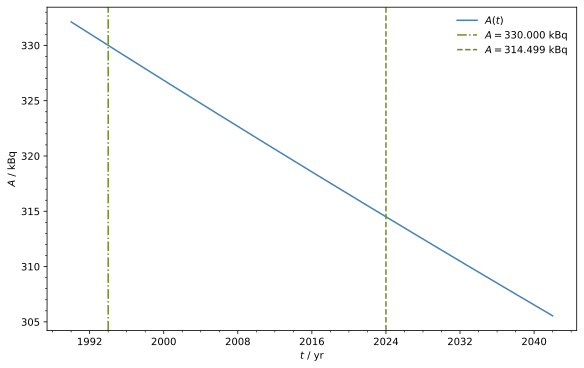

In [2]:
def decay(T_yr):
    T_12_yr = 432.2
    A_Bq = 330e3
    return A_Bq * 2**( (1994 - T_yr) / T_12_yr)

t = np.linspace(1990, 2042, 1000)

plt.plot(t, decay(t) / 1e3, c='steelblue', label='$A(t)$')
plt.axvline(1994, ls='-.', c='olivedrab', label=f'$A = {decay(1994) / 1e3:.3f}$ kBq')
plt.axvline(2024, ls='--', c='olivedrab', label=f'$A = {decay(2024) / 1e3:.3f}$ kBq')

plt.xticks(np.arange(1992, 2042, 8))

plt.xlabel('$t$ / yr')
plt.ylabel('$A$ / kBq')

plt.legend()

plt.show()
plt.close()
a= np.pi

$$^{241}_{95}\text{Am} \rightarrow ^{237}_{93}\text{Np} + ^4_2\text{He} + E_\alpha
\qquad E_\alpha = 5.486 \text{ MeV}$$

#### Theoretische Werte für den Energieverslust

$$-\frac{dE_\alpha}{dx} = \frac{e^4 z^2 NZ}{4 \pi m_e v_\alpha^2 \varepsilon_0^2} \, \ln\left( \frac{2 m_e v_\alpha^2}{I} \right)
= \frac{e^4 m_\alpha z^2 NZ}{8 \pi m_e E_\alpha \varepsilon_0^2} \, \ln\left( \frac{4 m_e E_\alpha}{I m_\alpha} \right) $$

$$R_\alpha = \int_0^{E_\alpha} \left( -\frac{dE_\alpha}{dx} \right)^{-1} dE_\alpha
= \frac{8 \pi m_e E_\alpha^2 \varepsilon_0^2}{e^4 m_\alpha z^2 N Z \ln (4 m_e E_\alpha / I m_\alpha)}
= \frac{2 \pi m_e m_\alpha v_\alpha^4 \varepsilon_0^2}{e^4 z^2 N Z \ln (2 m_e v_\alpha^2 / I)}$$

#### Berechnung der Teilchenzahlen und Dichten für Luft und Gold

$$\begin{align*}
Z_{N_2} &= 7 & Z_{O_2} &= 8 & Z_L &= \tfrac{78}{99} Z_{N_2} + \tfrac{21}{99} Z_{O_2} = 7.21 \\
M_{N_2} &= 2 \cdot 14.01 \text{ g/mol} & M_{O_2} &= 2 \cdot 16.00 \text{ g/mol}
& M_L &= \tfrac{78}{99} M_{N_2} + \tfrac{21}{99} M_{O_2} = 28.86 \text{ g/mol} \\
\rho_{N_2} &= 1165 \text{ g/m}^3 & \rho_{O_2} &= 1332 \text{ g/m}^3
& \rho_L &= \tfrac{78}{99} \rho_{N_2} + \tfrac{21}{99} \rho_{O_2} = 1200 \text{ g/m}^3 \\
\end{align*}$$

$$\begin{align*}
M_G = 196.67 \text{ g/mol} && \rho_G = 19320 \text{ g/m}^3 \\
\end{align*}$$

$$\begin{align*}
N_L &= N_A \frac{\rho_L}{M_L} = 250 \cdot 10^{23} \text{ m}^{-3} \\
N_G &= N_A \frac{\rho_G}{M_G} = 591000 \cdot 10^{23} \text{ m}^{-3}
\end{align*}$$

#### Druckabhängige Reichweite von Alphastrahlung in Luft

$$\rho = \frac{p}{RT} \qquad R_\alpha \propto p^{-1}$$

In [3]:
A = const.e**4 * 6.645e-27 * 2**2 * 250 * 10**23 * 7.21 * np.log(4 * const.m_e * 5.486e6 * const.e / (72.1 * const.e * 6.645e-27))
B = 8 * np.pi * const.m_e * 5.486e6 * const.e * const.epsilon_0**2

dEdx = A / B

print(f'dE/dx = {dEdx:.3} J / m = {dEdx / const.e:.3} eV / m')
print('')

a = 8 * np.pi * const.m_e * (5.486e6 * const.e)**2 * const.epsilon_0**2
b = const.e**4 * 6.645e-27 * 2**2 * 250 * 10**23 * 7.21 * np.log(4 * const.m_e * 5.486e6 * const.e / (72.1 * const.e * 6.645e-27))

R = a / b

print(f'R =  {R:.3f} m bei p = 1000 mbar')
print(f'R =  1.000 m bei p =  118 mbar')
print(f'R = 10.000 m bei p =   12 mbar')

dE/dx = 7.47e-12 J / m = 4.66e+07 eV / m

R =  0.118 m bei p = 1000 mbar
R =  1.000 m bei p =  118 mbar
R = 10.000 m bei p =   12 mbar


#### Einfluss elektronischer Bauteile auf Impulse

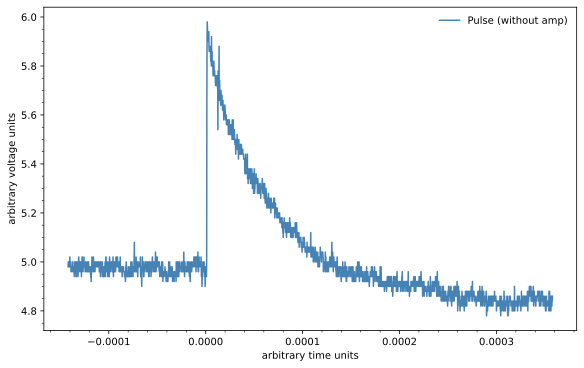

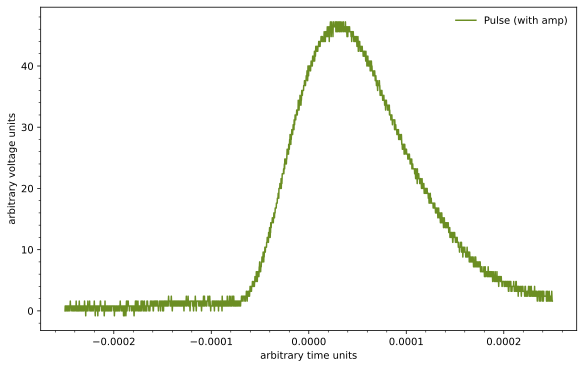

In [4]:
without_amp_x, without_amp_y = np.genfromtxt('data/altprotokoll/without_amp.txt', unpack=True)
with_amp_x, with_amp_y = np.genfromtxt('data/altprotokoll/with_amp.txt', unpack=True)

plt.plot(1e0 * without_amp_x, without_amp_y, c='steelblue', label='Pulse (without amp)')

plt.xlabel('arbitrary time units')
plt.ylabel('arbitrary voltage units')

plt.legend()

plt.show()
plt.close()

plt.plot(1e2 * with_amp_x, with_amp_y, c='olivedrab', label='Pulse (with amp)')

plt.xlabel('arbitrary time units')
plt.ylabel('arbitrary voltage units')

plt.legend()

plt.show()
plt.close()

#### Lineare Ausgleichsrechnung zur Bestimmung der Filmdicke

Ohne Folie:


$p \text{ / mbar}$,$U \text{ / V}$
0.000000,12.100000
7.900000,11.800000
18.500000,11.500000
35.100000,10.800000
55.700000,9.600000
88.800000,8.900000
119.800000,8.200000
151.400000,6.700000
181.600000,5.200000
210.100000,4.400000



Mit Folie:


$p \text{ / mbar}$,$U \text{ / V}$
0.000000,9.800000
7.900000,9.500000
18.500000,8.800000
35.100000,8.300000
55.700000,7.800000
88.800000,6.100000
119.800000,5.200000
151.400000,4.300000
181.600000,3.100000
210.100000,2.700000


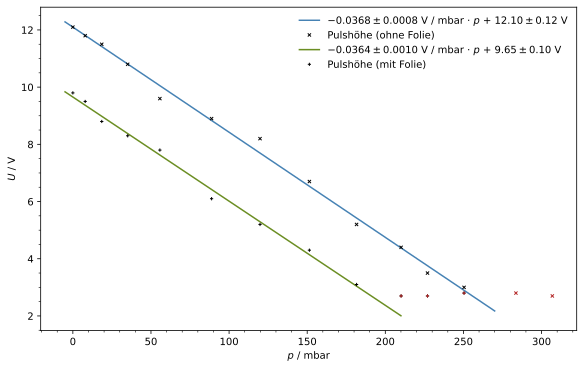

In [14]:
of_p, of_U = np.genfromtxt('data/ohne_folie.txt', unpack=True)
mf_p, mf_U = np.genfromtxt('data//mit_folie.txt', unpack=True)

of_df = df({r'$p \text{ / mbar}$':of_p, r'$U \text{ / V}$':of_U})
mf_df = df({r'$p \text{ / mbar}$':mf_p, r'$U \text{ / V}$':mf_U})

print('Ohne Folie:')
display(of_df.style.hide())
print('')
print('Mit Folie:')
display(mf_df.style.hide())

of_par, of_cov = np.polyfit(of_p[:-2], of_U[:-2], deg=1, cov=True)
of_err = np.sqrt(np.diag(of_cov))
of_par = uar(of_par, of_err)

mf_par, mf_cov = np.polyfit(mf_p[:-3], mf_U[:-3], deg=1, cov=True)
mf_err = np.sqrt(np.diag(mf_cov))
mf_par = uar(mf_par, mf_err)

of = np.linspace(-5, 270, 1000)
mf = np.linspace(-5, 210, 1000)

def lin(x, a, b):
    return a * x + b

plt.plot(of, lin(of, *noms(of_par)), c='steelblue', label=f'${of_par[0]:L}$ V / mbar $\cdot$ $p$ $+$ ${of_par[1]:L}$ V')
plt.plot(of_p[:-2], of_U[:-2], 'kx', ms=3.21, label='Pulshöhe (ohne Folie)')
plt.plot(of_p[-2:], of_U[-2:], 'x', ms=3.21, c='firebrick')

plt.plot(mf, lin(mf, *noms(mf_par)), c='olivedrab', label=f'${mf_par[0]:L}$ V / mbar $\cdot$ $p$ $+$ ${mf_par[1]:L}$ V')
plt.plot(mf_p, mf_U, 'k+', ms=3.21, label='Pulshöhe (mit Folie)')
plt.plot(mf_p[-3:], mf_U[-3:], '+', ms=3.21, c='firebrick')

plt.xlabel('$p$ / mbar')
plt.ylabel('$U$ / V')

plt.legend()

plt.show()
plt.close()

In [42]:
def um(y, a, b):
    return (y - b) / a

Ua = np.max(of_U) / 2

pa = um(Ua, *of_par)

dp = um(Ua, *of_par) - um(Ua, *mf_par)

Ea = 5.486e6

dE = Ea * dp / pa

ad = 8 * np.pi * const.m_e * Ea * const.e * const.epsilon_0**2
bd = 6.6446573357e-27 * const.e**4 * 5.9e28 * 2**2 * 79 * np.log(4 * const.m_e * Ea * const.e / (6.6446573357e-27 * 790 * const.e))
d = dE * const.e * ad/bd

dU = lin(pa, *of_par) - lin(pa, *mf_par)

dEE = Ea * dU / Ua

add = 8 * np.pi * const.m_e * Ea * const.e * const.epsilon_0**2
bdd = 6.6446573357e-27 * const.e**4 * 5.9e28 * 2**2 * 79 * np.log(4 * const.m_e * Ea * const.e / (6.6446573357e-27 * 790 * const.e))
dd = dEE * const.e * add/bdd

$$\begin{align*}
U &= a \cdot p + b & p &= \frac{U - b}{a} & \Delta E = E_\alpha \, \frac{\Delta p}{p_\alpha}
\end{align*}$$

In [31]:
Ea_eV = 5.486e6
I_eV = 790
ma_eV = 3727.3794066e6
dE_eV = Ea_eV * (1 - mf_par[1] / of_par[1])

Ea_J = Ea_eV * const.e
I_J = I_eV * const.e
ma_kg = 6.6446573357e-27
dE_J = Ea_J * (1 - mf_par[1] / of_par[1])

print(f'dE = {dE_eV} eV = {dE_J} J')

dE = (1.11+/-0.06)e+06 eV = (1.78+/-0.10)e-13 J


$$\Delta E_\alpha = E_\alpha \frac{b_\text{of} - b_\text{mf}}{b_\text{of}} = E_\alpha \left( 1 - \frac{b_\text{mf}}{b_\text{of}} \right)$$

In [32]:
N = 5.9e28
z = 2
Z = 79

m_e = const.m_e
eps_0 = const.epsilon_0
e = const.e

d = dE_J * 2 * m_e * Ea_J * 4 * np.pi * eps_0**2 / (ma_kg * e**4 * N * z*2 * Z * np.log(4 * m_e * Ea_J / (ma_kg * I_J)))

print(f'd = {d} m')

d = (2.57+/-0.14)e-06 m


$$d = \Delta x_\alpha = \Delta E_\alpha \frac{4\pi m_e v_\alpha^2 \varepsilon_0^2}{e^4 N z^2 Z \ln (2m_e v_\alpha^2 / I)}
= \Delta E_\alpha \frac{8\pi m_e E_\alpha \varepsilon_0^2}{m_\alpha e^4 N z^2 Z \ln (4m_e E_\alpha / m_\alpha I)}$$

#### Wirkungsquerschnitt aus Atomen in der Fläche

$$\begin{align*}
F = 2 \text{ mm} \cdot 10 \text{ mm} = 20 \text{ mm}^2 = 2 \cdot 10^{-5} \text{ m}^2 &&
d = 2 \text{ }\micro\text{m} = 2 \cdot 10^{-6} \text{ m} &&
V = F \cdot d = 4 \cdot 10^{-11} \text{ m}^3 &&
n = N_G \cdot V = 2364 \cdot 10^{18} \\
\end{align*}$$

$$\sigma = \frac{CF}{An}$$

$$\int_0^{2\pi} \frac{d\sigma}{d\Omega} \, d\varphi = \frac{d\sigma}{d\cos\theta}
= \frac{\sigma_{i+1} - \sigma_i}{\cos\theta_{i+1} - \cos\theta_{i}}$$

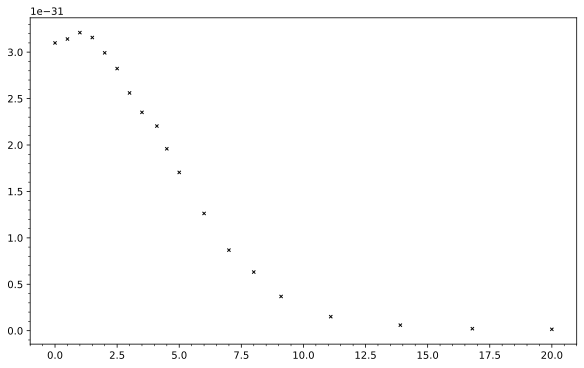

In [8]:
ang, c, t = np.genfromtxt('data/altprotokoll/winkel.txt', unpack=True)
C = uar(c / t, np.sqrt(c) / t)

F = 2e-5
A = decay(2024)
n = 2365e18

sig = C * F / (A * n)
dsig = (sig[1:] - sig[:-1]) / (np.cos(ang[1:] * np.pi / 180) - np.cos(ang[:-1] * np.pi / 180))

dang = (ang[1:] + ang[:-1]) / 2

plt.plot(ang, noms(sig), 'kx', ms=3.21)
#plt.plot(dang, noms(dsig), 'kx', ms=3.21)

plt.show()
plt.close()